In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../reuters_lowresource_ourvstheirs_google.csv")
df

,Unnamed: 0,test_name,acc,ductive,seed,unlabeled_amount,labeled_amount
0,0,2 layer default GCN with Edge Weights,0.541,trans,0,1000,400
1,1,2 layer default GCN without Edge Weights,0.250,trans,0,1000,400
2,2,2 layer their GCN with Edge Weights,0.793,trans,0,1000,400
3,3,2 layer their GCN without Edge Weights,0.878,trans,0,1000,400
4,4,2 layer default GCN with Edge Weights,0.666,in,0,1000,400
...,...,...,...,...,...,...,...
75,75,2 layer their GCN without Edge Weights,0.869,trans,9,1000,400
76,76,2 layer default GCN with Edge Weights,0.568,in,9,1000,400
77,77,2 layer default GCN without Edge Weights,0.742,in,9,1000,400
78,78,2 layer their GCN with Edge Weights,0.845,in,9,1000,400


In [67]:
mean_std_dic = {}

for ductive, i_df in df.groupby("ductive"):
    for model, j_df in i_df.groupby("test_name"):
        mean = j_df["acc"].mean()
        var = j_df["acc"].std()
        
        mean_std_dic[ductive + " " + model] = (mean, var)
        
mean_std_dic

{'in 2 layer default GCN with Edge Weights': (0.6277999999999999,
  0.050338410339973536),
 'in 2 layer default GCN without Edge Weights': (0.7454, 0.013234634696717349),
 'in 2 layer their GCN with Edge Weights': (0.8415000000000001,
  0.012920698295542848),
 'in 2 layer their GCN without Edge Weights': (0.8436, 0.010956479564369435),
 'trans 2 layer default GCN with Edge Weights': (0.41530000000000006,
  0.11195043546141302),
 'trans 2 layer default GCN without Edge Weights': (0.3104,
  0.07634745138728163),
 'trans 2 layer their GCN with Edge Weights': (0.7798, 0.015017027372656375),
 'trans 2 layer their GCN without Edge Weights': (0.8797,
  0.011255122290662925)}

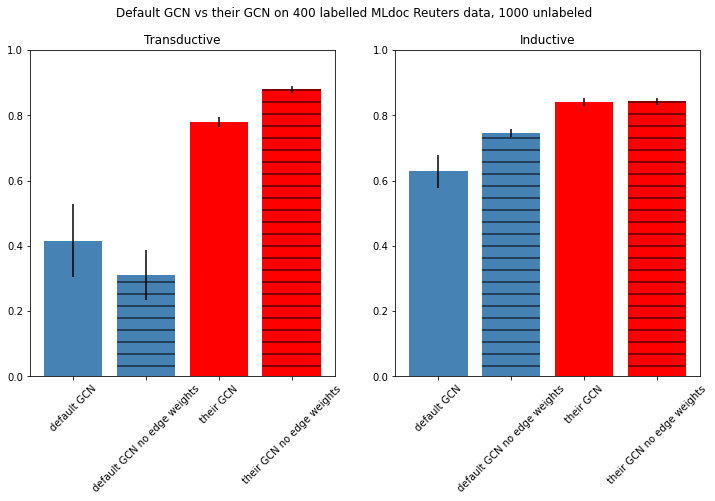

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

for i, (key, (mean, var)) in enumerate(mean_std_dic.items()):
    if "default" in key:
        color = "steelblue"
    else:
        color = "red"
        
    if "trans" in key:
        plot = 0
    else:
        plot = 1
        
    if "without" in key:
        pattern = "-"
    else:
        pattern = " "

    axes[plot].bar(i%4, mean, yerr=var, color=color, hatch=pattern)
    
plt.setp(axes, ylim=(0,1), xticks=[0, 1, 2, 3], xticklabels=['default GCN', 'default GCN no edge weights',
                                                             'their GCN',  'their GCN no edge weights'], )
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation='45')
    
axes[0].set_title("Transductive")
axes[1].set_title("Inductive")
    
fig.suptitle("Default GCN vs their GCN on 400 labelled MLdoc Reuters data, 1000 unlabeled")
    
plt.show()